In [1]:
import lane_detection_pipeline as pipeline

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(240, 320, 3)


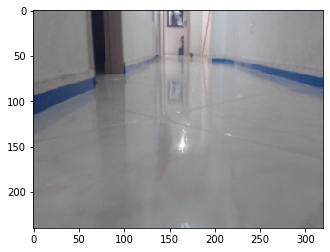

In [3]:
img_lane = cv2.imread('dataSet3/image_1628786135241.jpg')
plt.imshow(cv2.cvtColor(img_lane, cv2.COLOR_BGR2RGB))
print(img_lane.shape)

In [4]:
(height, width) = img_lane.shape[:2]

mid_offset = 80
bottom_offset = 0
x_offset = 0
y_bottom_offset = 140
y_top_offset = 50

mid_y = height // 2
mid_width = width // 2

left_bottom = (0 + bottom_offset + x_offset, height - y_bottom_offset)
right_bottom = (width - bottom_offset + x_offset, height - y_bottom_offset)
apex1 = ( mid_width - mid_offset + x_offset, mid_y - y_top_offset)
apex2 = ( mid_width + mid_offset + x_offset, mid_y - y_top_offset)
corners = [left_bottom, right_bottom, apex2, apex1]

print(corners)

[(0, 100), (320, 100), (240, 70), (80, 70)]


In [5]:
lane_processing = pipeline.LaneDetection(corners)

## Select channel

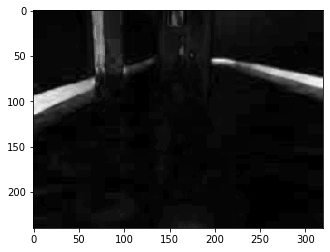

In [6]:
s_channel = lane_processing._select_channel(img_lane)
plt.imshow(s_channel, cmap='gray')

## Binary Operation

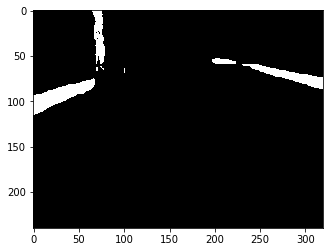

In [7]:
binary_img = lane_processing._binary(s_channel, 80, 255)
plt.imshow(binary_img, cmap='gray')

## Draw polygon region (optional)

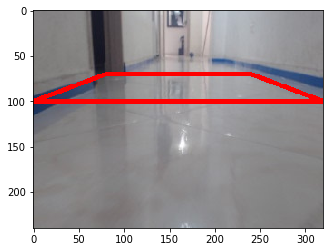

In [8]:
draw_region = pipeline.draw_region(img_lane, corners)
plt.imshow(cv2.cvtColor(draw_region, cv2.COLOR_BGR2RGB))

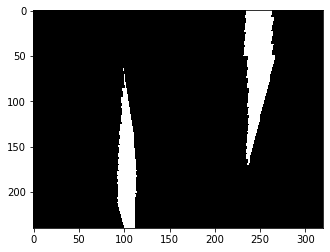

In [9]:
inv_corners = corners[::-1]
bird_view, M = lane_processing._bird_view(binary_img)
plt.imshow(bird_view, cmap='gray')

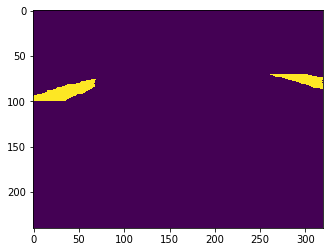

In [10]:
img_inv = cv2.warpPerspective(bird_view, lane_processing._M_inv, (width, height))
plt.imshow(img_inv)

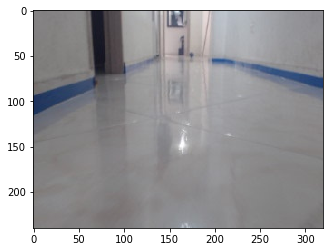

In [11]:
out_img = lane_processing._segmentation_lane_detection(img_inv, img_lane)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))

## Use complete pipeline in a single function

In [12]:
result = lane_processing.process_image(img_lane)
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

TypeError: _segmentation_lane_detection() missing 1 required positional argument: 'img_lane'

In [ ]:
a = None

In [ ]:
img_lane.shape[:2]